In [1]:
# Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [15]:
# Load the data
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

# Separate features and labels
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Reshape the data to 28x28 images
X_train_images = X_train.reshape(-1, 28, 28)
X_test_images = X_test.reshape(-1, 28, 28)

Shape of training data: (60000, 784)
Shape of test data: (10000, 784)
Class 0: 6000 samples (T-shirt/top)
Class 1: 6000 samples (Trouser)
Class 2: 6000 samples (Pullover)
Class 3: 6000 samples (Dress)
Class 4: 6000 samples (Coat)
Class 5: 6000 samples (Sandal)
Class 6: 6000 samples (Shirt)
Class 7: 6000 samples (Sneaker)
Class 8: 6000 samples (Bag)
Class 9: 6000 samples (Ankle boot)


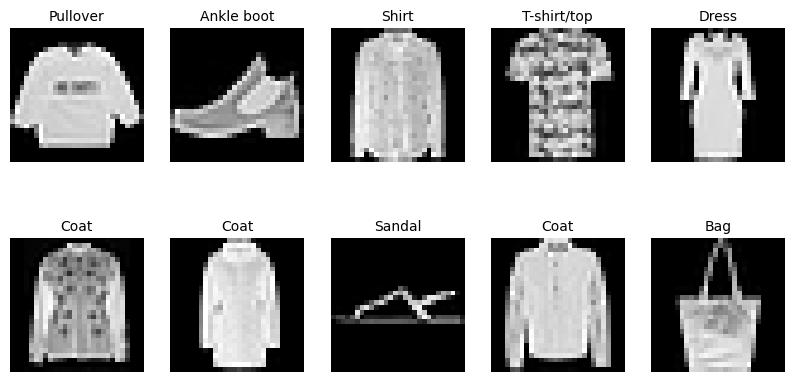

In [3]:
# Check the shape of the dataset
print("Shape of training data:", X_train.shape)
print("Shape of test data:", X_test.shape)

# Check the count of samples per class
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

class_counts = np.bincount(y_train)
for i, count in enumerate(class_counts):
    print(f"Class {i}: {count} samples ({class_labels[i]})")

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_images[i], cmap='gray')
    plt.title(class_labels[y_train[i]], fontsize=10)
    plt.axis('off')
plt.show()

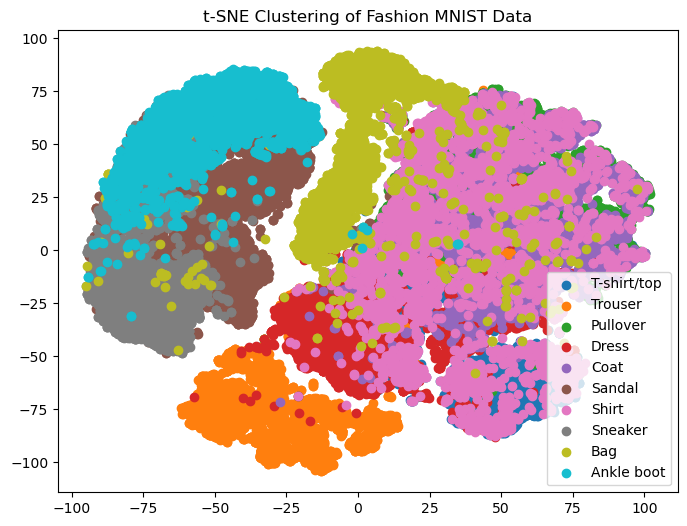

In [4]:
# Apply t-SNE for dimensionality reduction and visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

# Plot the t-SNE clusters
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(X_tsne[y_train == i, 0], X_tsne[y_train == i, 1], label=class_labels[i])
plt.title("t-SNE Clustering of Fashion MNIST Data")
plt.legend()
plt.show()

S:\Karim\Internship\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


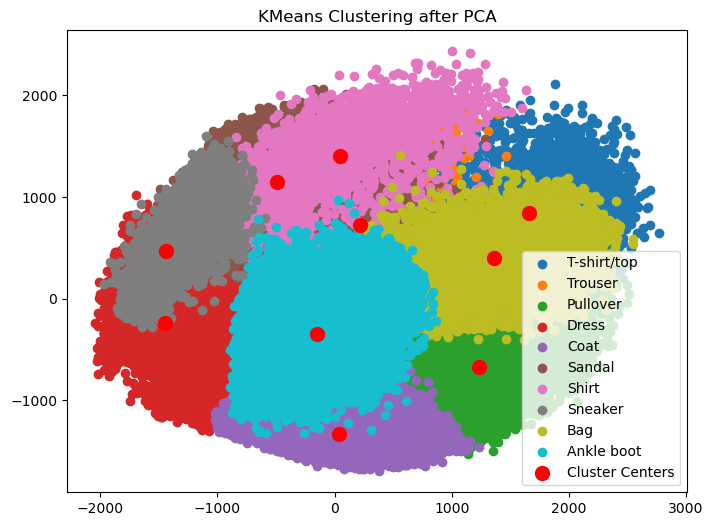

In [5]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_train)

# Apply KMeans clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=10, random_state=42)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)

# Plot the KMeans clusters after PCA
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(X_pca[y_kmeans_pca == i, 0], X_pca[y_kmeans_pca == i, 1], label=class_labels[i])
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1],
            s=100, c='red', label='Cluster Centers')
plt.title("KMeans Clustering after PCA")
plt.legend()
plt.show()

S:\Karim\Internship\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


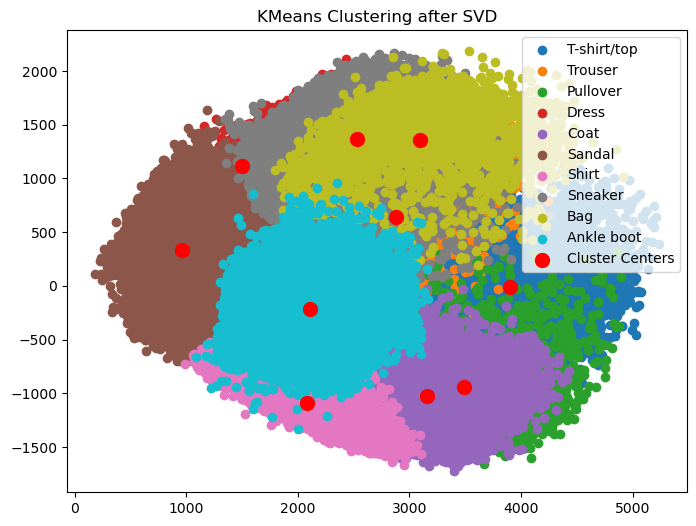

In [16]:
# Apply SVD for dimensionality reduction
svd = TruncatedSVD(n_components=50, random_state=42)
X_svd = svd.fit_transform(X_train)

# Apply KMeans clustering on SVD-transformed data
kmeans_svd = KMeans(n_clusters=10, random_state=42)
y_kmeans_svd = kmeans_svd.fit_predict(X_svd)

# Plot the KMeans clusters after SVD
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(X_svd[y_kmeans_svd == i, 0], X_svd[y_kmeans_svd == i, 1], label=class_labels[i])
plt.scatter(kmeans_svd.cluster_centers_[:, 0], kmeans_svd.cluster_centers_[:, 1],
            s=100, c='red', label='Cluster Centers')
plt.title("KMeans Clustering after SVD")
plt.legend()
plt.show()

S:\Karim\Internship\Anaconda\Lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
S:\Karim\Internship\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


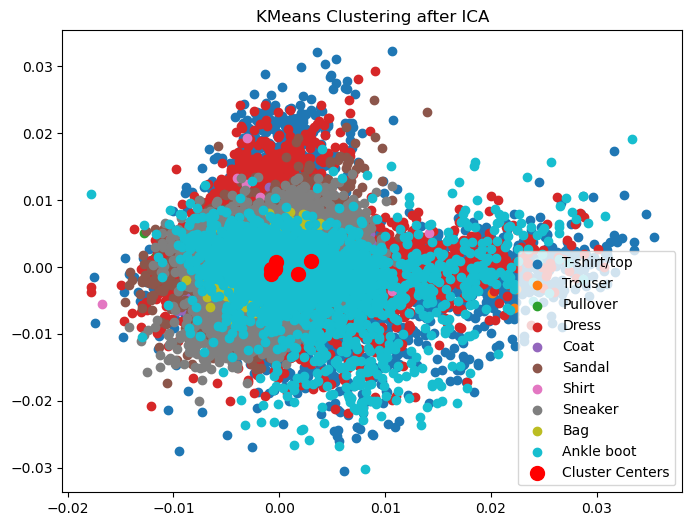

In [7]:
# Apply ICA for dimensionality reduction
ica = FastICA(n_components=50, random_state=42)
X_ica = ica.fit_transform(X_train)

# Apply KMeans clustering on ICA-transformed data
kmeans_ica = KMeans(n_clusters=10, random_state=42)
y_kmeans_ica = kmeans_ica.fit_predict(X_ica)

# Plot the KMeans clusters after ICA
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(X_ica[y_kmeans_ica == i, 0], X_ica[y_kmeans_ica == i, 1], label=class_labels[i])
plt.scatter(kmeans_ica.cluster_centers_[:, 0], kmeans_ica.cluster_centers_[:, 1],
            s=100, c='red', label='Cluster Centers')
plt.title("KMeans Clustering after ICA")
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import silhouette_score

print("Silhouette Score after PCA:", silhouette_score(X_pca, y_kmeans_pca))
print("Silhouette Score after SVD:", silhouette_score(X_svd, y_kmeans_svd))
print("Silhouette Score after ICA:", silhouette_score(X_ica, y_kmeans_ica))

Silhouette Score after PCA: 0.18800188457475503
Silhouette Score after SVD: 0.1975960632323797
Silhouette Score after ICA: 0.04041095607345972


In [12]:
# Apply SVD for dimensionality reduction
svd_best = TruncatedSVD(n_components=50, random_state=42)
X_best = svd_best.fit_transform(X_train)

# Apply KMeans

In [13]:
# In this workflow, we performed an exploratory data analysis (EDA) on the Fashion-MNIST dataset to understand its structure and visualize some sample images from each class. 
# Then, we applied various unsupervised learning techniques to cluster the data without using class labels.

In [14]:
# To determine the best working method, we evaluated the clustering performance using the silhouette score. The silhouette score measures how similar an object is to its own cluster compared to other clusters. 
# Higher silhouette scores indicate better-defined clusters.

# Based on the silhouette scores obtained after applying each method, we determined that SVD produced the best results